11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9008 - loss: 0.3338 - val_accuracy: 0.9827 - val_loss: 0.0557
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9856 - loss: 0.0498 - val_accuracy: 0.9902 - val_loss: 0.0299
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9889 - loss: 0.0331 - val_accuracy: 0.9881 - val_loss: 0.0348
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9920 - loss: 0.0245 - val_accuracy: 0.9886 - val_loss: 0.0317


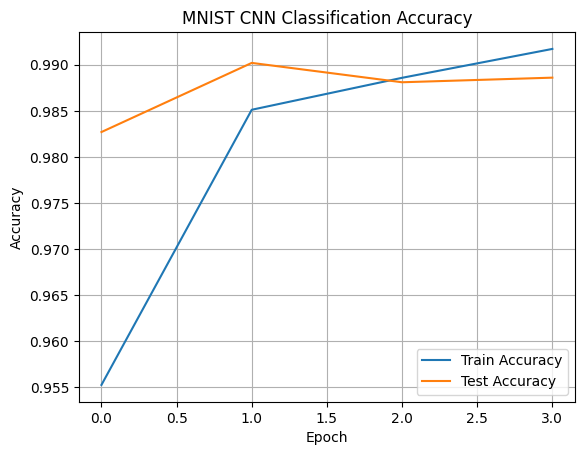

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


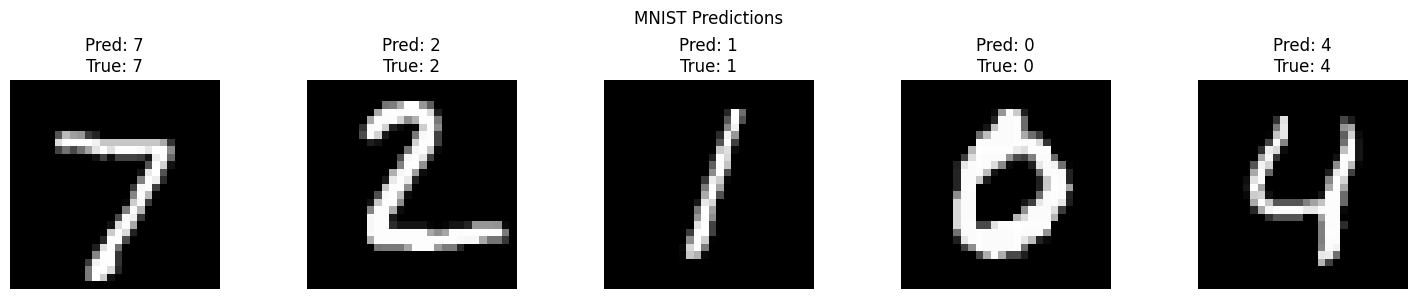

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Set dataset flag: 'mnist' or 'cifar10'
dataset_name = 'mnist'  # Change to 'mnist' if needed


# Load and preprocess dataset
if dataset_name == 'mnist':
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)
    input_shape = (28, 28, 1)
    num_classes = 10
    grayscale = True

# Normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 4
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title(f'{dataset_name.upper()} CNN Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Display & Predict Images
# ----------------------------

num_images = 5
plt.figure(figsize=(15, 3))

for i in range(num_images):
    image = X_test[i]
    label = y_test[i]
    prediction = model.predict(image.reshape(1, *input_shape))
    predicted_label = np.argmax(prediction)

    plt.subplot(1, num_images, i + 1)
    if grayscale:
        plt.imshow(image.squeeze(), cmap='gray')
    else:
        plt.imshow(image)

    if dataset_name == 'cifar10':
        pred_name = cifar10_labels[predicted_label]
        true_name = cifar10_labels[label]
        plt.title(f"Pred: {pred_name}\nTrue: {true_name}")
    else:
        plt.title(f"Pred: {predicted_label}\nTrue: {label}")
    plt.axis('off')

plt.suptitle(f'{dataset_name.upper()} Predictions')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
1563/1563 - 9s - 6ms/step - accuracy: 0.4631 - loss: 1.4890 - val_accuracy: 0.5644 - val_loss: 1.2149
Epoch 2/4
1563/1563 - 7s - 5ms/step - accuracy: 0.6023 - loss: 1.1328 - val_accuracy: 0.6098 - val_loss: 1.0996
Epoch 3/4
1563/1563 - 10s - 7ms/step - accuracy: 0.6545 - loss: 0.9914 - val_accuracy: 0.6603 - val_loss: 0.9840
Epoch 4/4
1563/1563 - 6s - 4ms/step - accuracy: 0.6812 - loss: 0.9131 - val_accuracy: 0.6686 - val_loss: 0.9704


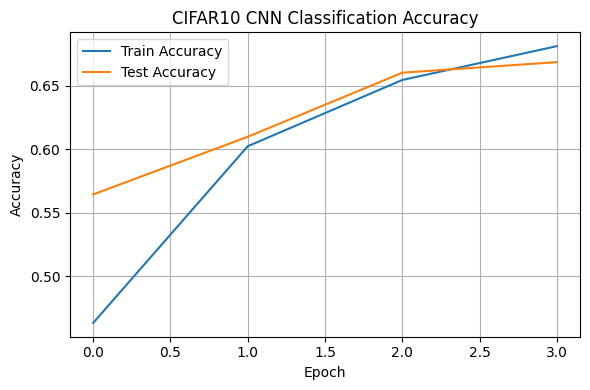

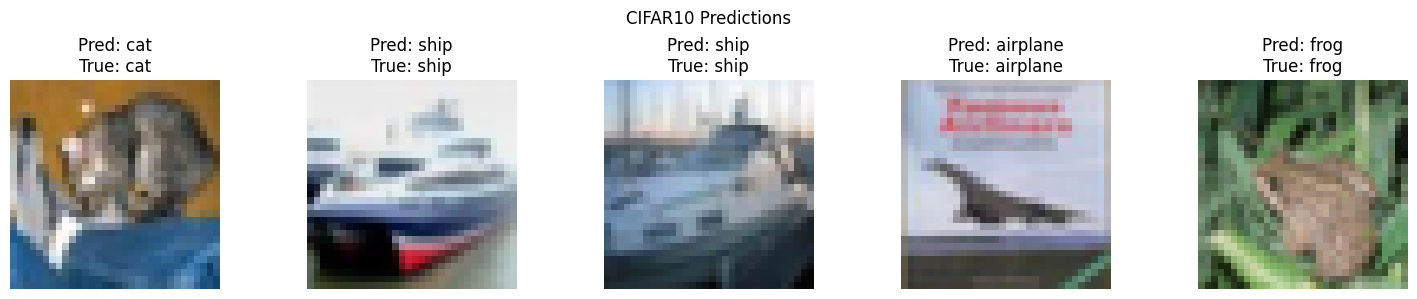

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Set dataset name
dataset_name = 'cifar10'  # change to 'mnist' if needed

# Class labels
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']

# Load and preprocess dataset
if dataset_name == 'mnist':
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)
    input_shape = (28, 28, 1)
    num_classes = 10
    grayscale = True
else:  # CIFAR-10
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    input_shape = (32, 32, 3)
    num_classes = 10
    grayscale = False

# Normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
epochs = 4
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    verbose=2)

# Plot training and validation accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title(f'{dataset_name.upper()} CNN Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# Predict and Display Images
# ----------------------------
num_images = 5
plt.figure(figsize=(15, 3))

for i in range(num_images):
    image = X_test[i]
    label = y_test[i]
    prediction = model.predict(image.reshape(1, *input_shape), verbose=0)
    predicted_label = np.argmax(prediction)

    plt.subplot(1, num_images, i + 1)
    if grayscale:
        plt.imshow(image.squeeze(), cmap='gray')
    else:
        plt.imshow(image)

    if dataset_name == 'cifar10':
        pred_name = cifar10_labels[predicted_label]
        true_name = cifar10_labels[label]
        plt.title(f"Pred: {pred_name}\nTrue: {true_name}")
    else:
        plt.title(f"Pred: {predicted_label}\nTrue: {label}")
    plt.axis('off')

plt.suptitle(f'{dataset_name.upper()} Predictions')
plt.tight_layout()
plt.show()
